## Análisis Exploratorio
**Integrantes:**
- Daniel Collaguazo
- José Villalta

**Dataset:** https://www.cancerimagingarchive.net/collection/osteosarcoma-tumor-assessment/

**Descripción del dataset:** El osteosarcoma es uno de los tipos más comunes de cáncer óseo primario, caracterizado por su rápida progresión y la tendencia a propagarse a otras partes del cuerpo.  Este tipo de cáncer afecta principalmente a los huesos largos y puede generar dolor persistente, inflamación, y en algunos casos, la formación de masas visibles.

In [36]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import copy
from sklearn.preprocessing import MinMaxScaler

print("Módulos y clases importados")

Módulos y clases importados


In [37]:
df = pd.read_csv('./dataset.csv', sep = ',')

df.drop(columns=df.columns[0], axis=1, inplace=True)

print('cantidad de observaciones: ', df.shape[0])
print('cantidad de variables: ', df.shape[1])
print(df.shape)
df.tail()

cantidad de observaciones:  1144
cantidad de variables:  68
(1144, 68)


,image.name,X.x,Blue.count,red.count,Blue.percentage,red.percentage,total.clusters,average.clusters.32,area,circularity,...,Texture_SumEntropy_3_90,Texture_SumVariance_3_0,Texture_SumVariance_3_135,Texture_SumVariance_3_45,Texture_SumVariance_3_90,Texture_Variance_3_0,Texture_Variance_3_135,Texture_Variance_3_45,Texture_Variance_3_90,classification
1139,P9 B7-4168-28271,1140,11382,23088,1.085472,2.201843,82,0.075229,72.817073,0.105594,...,0.569454,7.495672,7.301462,7.237001,7.360524,1.940082,1.962400,1.945191,1.957253,Non-Tumor
1140,P9 B7-5454-29446,1141,39543,106671,3.771114,10.172939,105,0.096330,82.514286,0.121141,...,1.301057,20.867141,20.851655,20.402554,20.820827,5.393011,5.402609,5.402216,5.396802,Non-Tumor
1141,P9 B7-6105-28215,1142,37018,89065,3.530312,8.493900,140,0.128440,80.678571,0.128883,...,1.253771,16.760665,16.571118,16.329112,16.750514,4.404424,4.412469,4.403766,4.410423,Non-Tumor
1142,P9 B7-7568-14821,1143,38353,82385,3.657627,7.856846,136,0.124771,75.522059,0.116099,...,1.352283,15.680088,15.420398,15.345445,15.808057,4.254347,4.246975,4.256830,4.248690,Non-Tumor
1143,P9 B7-8325-33733,1144,29535,248017,2.816677,23.652744,132,0.121101,77.681818,0.128773,...,1.755876,7.297974,7.349409,7.103187,7.233050,1.966834,1.962998,1.970873,1.969113,Non-Tumor


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   image.name                             1144 non-null   object 
 1   X.x                                    1144 non-null   int64  
 2   Blue.count                             1144 non-null   int64  
 3   red.count                              1144 non-null   int64  
 4   Blue.percentage                        1144 non-null   float64
 5   red.percentage                         1144 non-null   float64
 6   total.clusters                         1144 non-null   int64  
 7   average.clusters.32                    1144 non-null   float64
 8   area                                   1143 non-null   float64
 9   circularity                            1143 non-null   float64
 10  X.1                                    1144 non-null   int64  
 11  X.y 

In [39]:
df = df.dropna()
df = df.drop(['X.x', 'X.1', 'X.y', 'image.name', 'ImageNumber'], axis = 1)

In [40]:
df.describe()

,Blue.count,red.count,Blue.percentage,red.percentage,total.clusters,average.clusters.32,area,circularity,Count_Nuclei,Texture_AngularSecondMoment_3_0,...,Texture_SumEntropy_3_45,Texture_SumEntropy_3_90,Texture_SumVariance_3_0,Texture_SumVariance_3_135,Texture_SumVariance_3_45,Texture_SumVariance_3_90,Texture_Variance_3_0,Texture_Variance_3_135,Texture_Variance_3_45,Texture_Variance_3_90
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,59664.828521,149439.525809,5.690081,14.251664,301.495188,0.276601,73.792843,0.117528,167.937883,0.287454,...,1.742170,1.733739,12.323001,11.915756,11.821642,12.314931,3.560536,3.560179,3.559971,3.560490
std,42028.069475,82935.557535,4.008109,7.909351,279.821734,0.256717,7.459228,0.028305,101.673642,0.218793,...,0.524336,0.531239,6.370215,6.320723,6.231069,6.409742,1.748047,1.748849,1.748508,1.748418
min,3007.000000,7398.000000,0.286770,0.705528,2.000000,0.001835,43.304348,0.051146,0.000000,0.021966,...,0.163766,0.161289,0.277549,0.276564,0.276132,0.278095,0.071658,0.071583,0.071858,0.071653
25%,29586.500000,81895.000000,2.821589,7.810116,123.000000,0.112844,69.358059,0.097312,86.000000,0.109004,...,1.359391,1.340823,7.062826,6.587471,6.656759,7.039668,2.217645,2.216367,2.213851,2.213881
50%,50431.000000,137499.000000,4.809475,13.112926,217.000000,0.199083,74.103203,0.114996,146.000000,0.222341,...,1.854956,1.837146,11.615160,11.221590,11.287174,11.701360,3.431772,3.425784,3.429365,3.427542
75%,79483.500000,205260.000000,7.580137,19.575119,364.500000,0.334404,78.446835,0.133766,256.000000,0.428355,...,2.174684,2.176401,17.187467,16.643141,16.413829,17.121627,4.784769,4.786193,4.785935,4.784590
max,322157.000000,513281.000000,30.723286,48.950291,2009.000000,1.843119,115.046512,0.250506,443.000000,0.954611,...,2.615986,2.634901,38.446247,38.115103,37.900754,38.125986,10.119376,10.141639,10.114144,10.131054


In [41]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización solo a las columnas numéricas
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Mostrar las primeras filas del dataframe normalizado
print(df.head())

   Blue.count  red.count  Blue.percentage  red.percentage  total.clusters  \
0    0.042626   0.089106         0.042626        0.089106        0.060289   
1    0.282441   0.543424         0.282441        0.543424        0.070254   
2    0.328516   0.378526         0.328516        0.378526        0.081714   
3    0.174219   0.397713         0.174219        0.397713        0.075237   
4    0.032624   0.096920         0.032624        0.096920        0.039362   

   average.clusters.32      area  circularity  Count_Nuclei  \
0             0.060289  0.528945     0.150279      0.376975   
1             0.070254  0.367524     0.340944      0.162528   
2             0.081714  0.446838     0.219693      0.431151   
3             0.075237  0.349785     0.416494      0.155756   
4             0.039362  0.548836     0.226527      0.564334   

   Texture_AngularSecondMoment_3_0  ...  Texture_SumEntropy_3_90  \
0                         0.487932  ...                 0.448210   
1                     

In [42]:
df.describe()

,Blue.count,red.count,Blue.percentage,red.percentage,total.clusters,average.clusters.32,area,circularity,Count_Nuclei,Texture_AngularSecondMoment_3_0,...,Texture_SumEntropy_3_45,Texture_SumEntropy_3_90,Texture_SumVariance_3_0,Texture_SumVariance_3_135,Texture_SumVariance_3_45,Texture_SumVariance_3_90,Texture_Variance_3_0,Texture_Variance_3_135,Texture_Variance_3_45,Texture_Variance_3_90
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.177527,0.280779,0.177527,0.280779,0.149225,0.149225,0.424973,0.332974,0.379092,0.284661,...,0.643663,0.635690,0.315585,0.307602,0.306861,0.318032,0.347231,0.346433,0.347343,0.346823
std,0.131688,0.163942,0.131688,0.163942,0.139423,0.139423,0.103973,0.141979,0.229512,0.234594,...,0.213821,0.214763,0.166896,0.167045,0.165611,0.169355,0.173974,0.173668,0.174115,0.173809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083282,0.147261,0.083282,0.147261,0.060289,0.060289,0.363158,0.231569,0.194131,0.093323,...,0.487568,0.476847,0.177771,0.166785,0.169586,0.178651,0.213579,0.212986,0.213297,0.212958
50%,0.148595,0.257176,0.148595,0.257176,0.107125,0.107125,0.429299,0.320275,0.329571,0.214845,...,0.689657,0.677494,0.297039,0.289256,0.292655,0.301820,0.334416,0.333087,0.334337,0.333607
75%,0.239626,0.391122,0.239626,0.391122,0.180618,0.180618,0.489844,0.414426,0.577878,0.435738,...,0.820040,0.814643,0.443031,0.432537,0.428913,0.445032,0.469073,0.468181,0.469423,0.468511
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='classification', ylabel='count'>

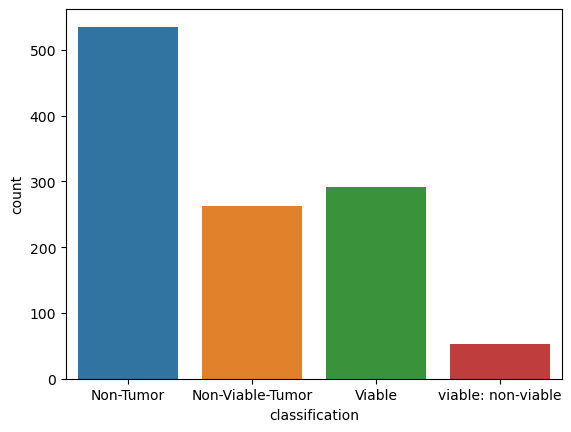

In [43]:
Y = df['classification']
sns.countplot(x=Y)

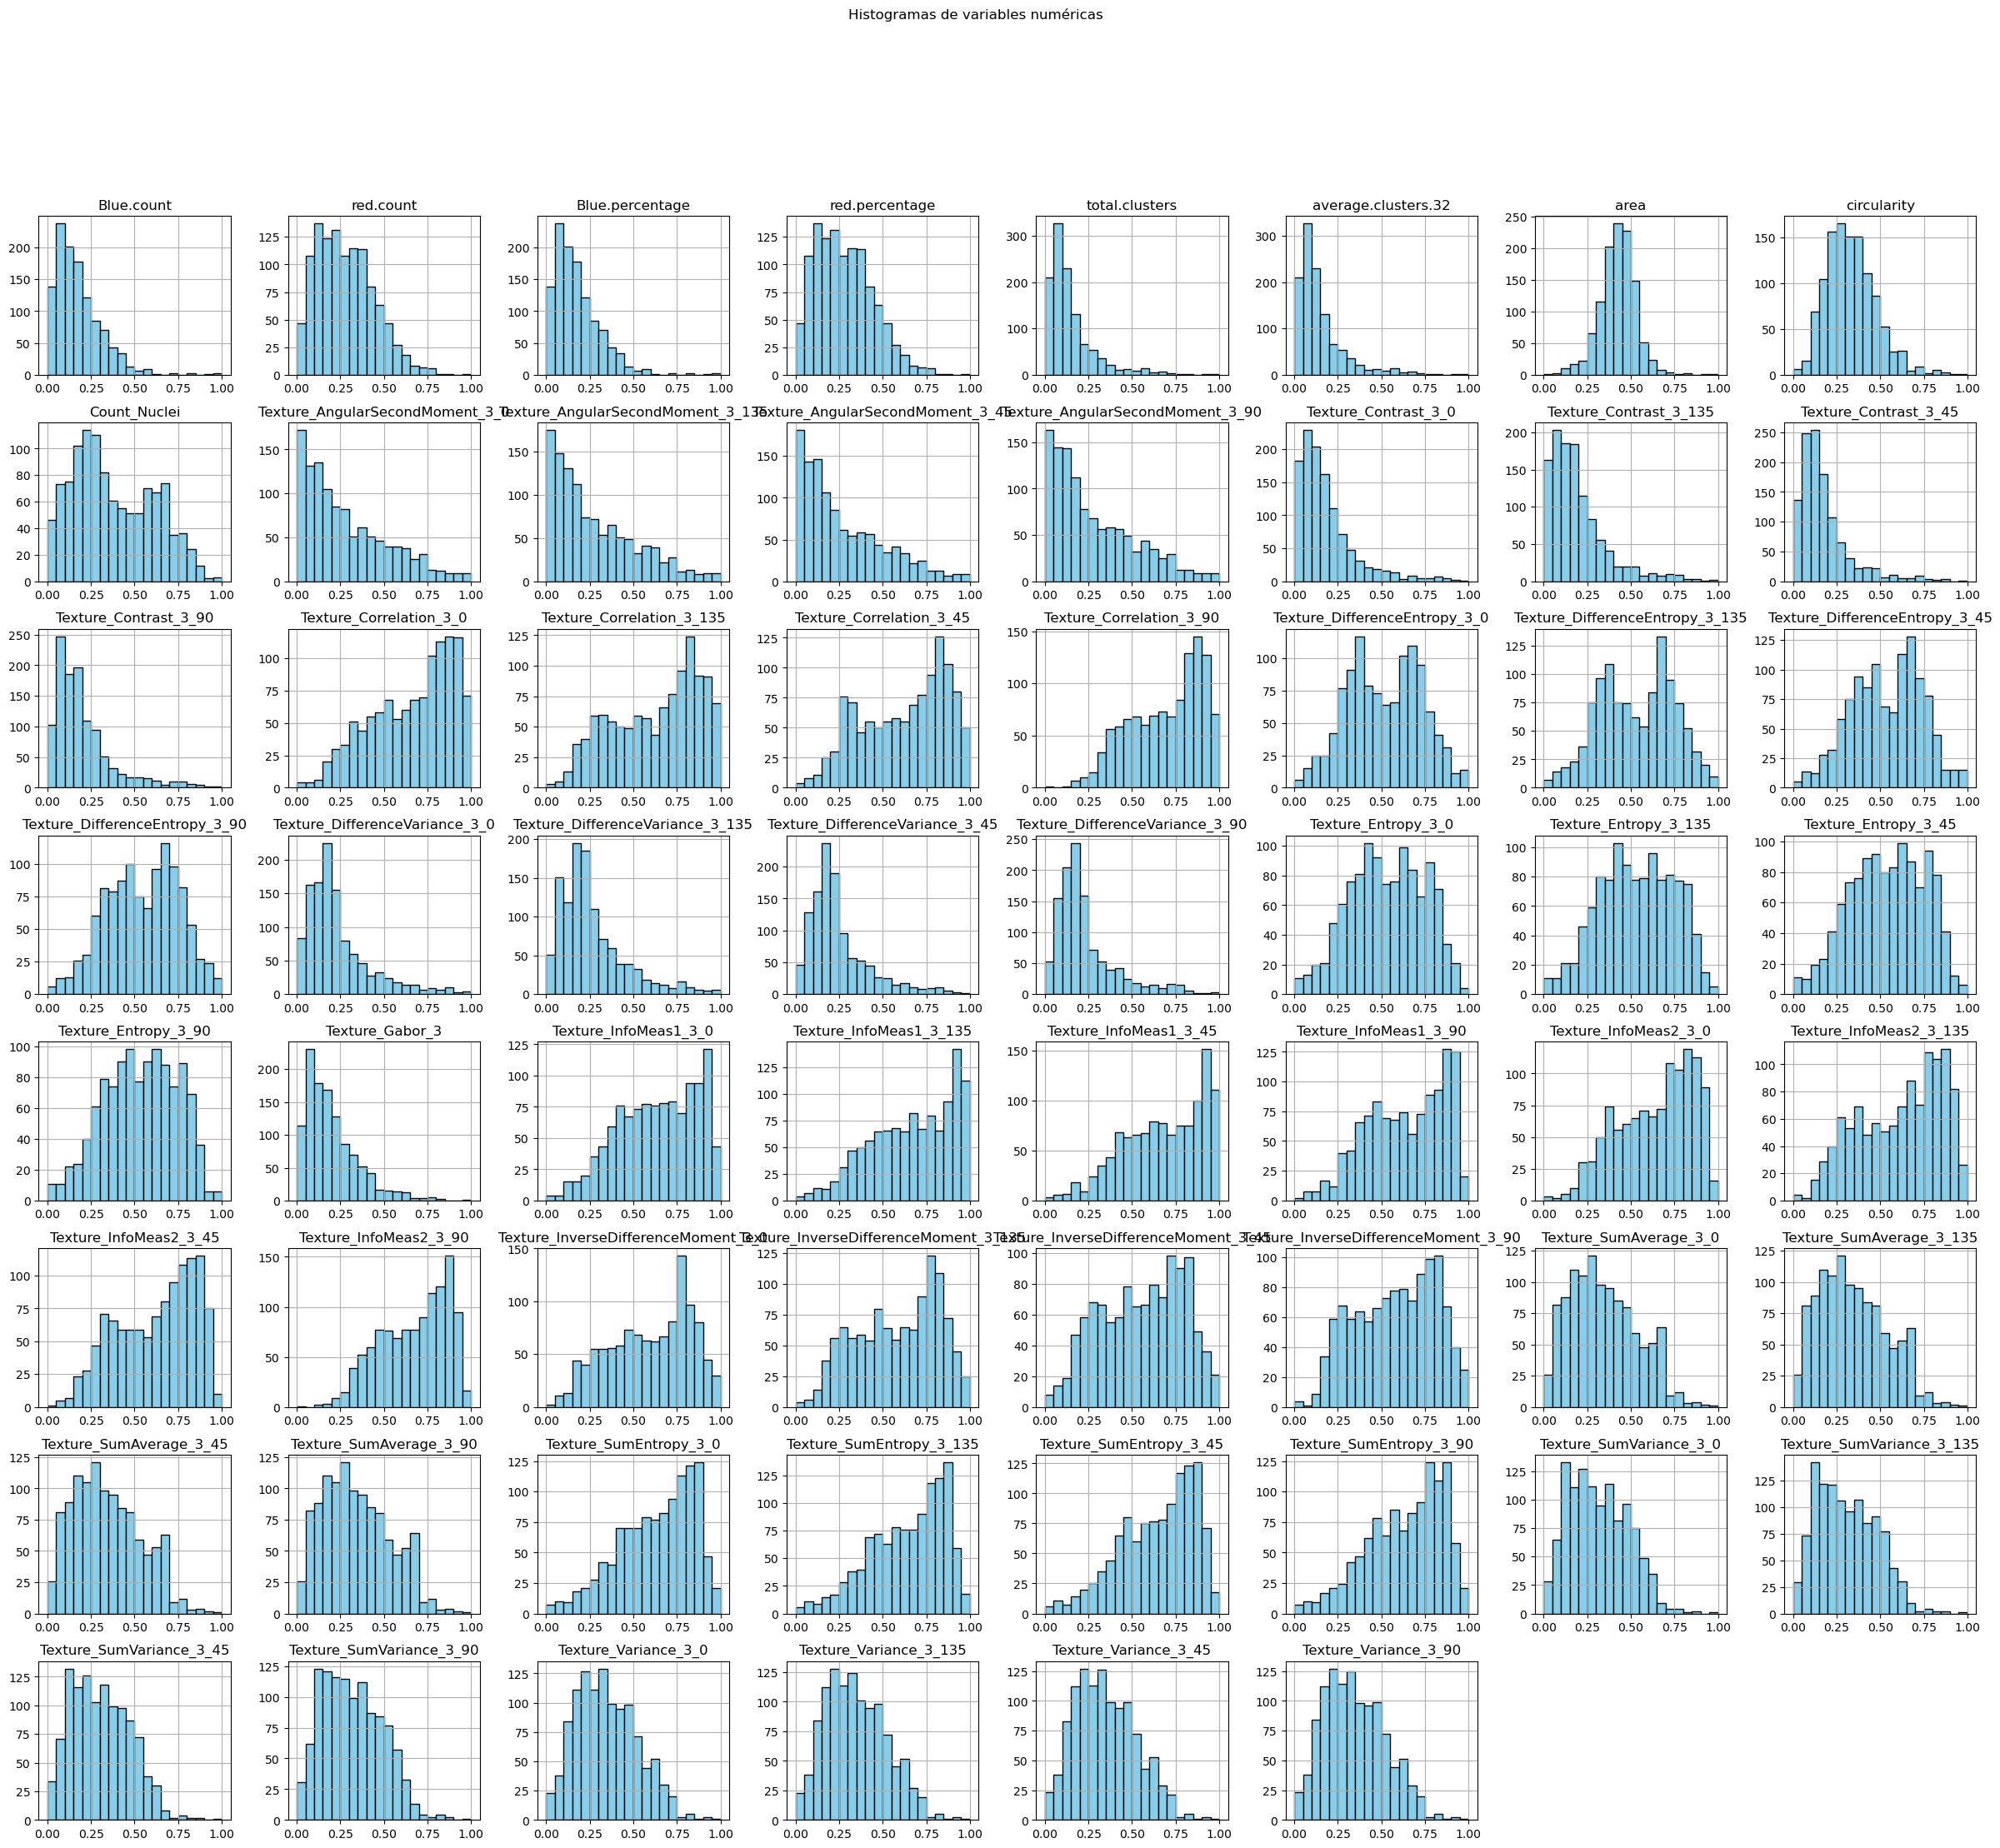

In [52]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(30, 25), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de variables numéricas')
plt.show()

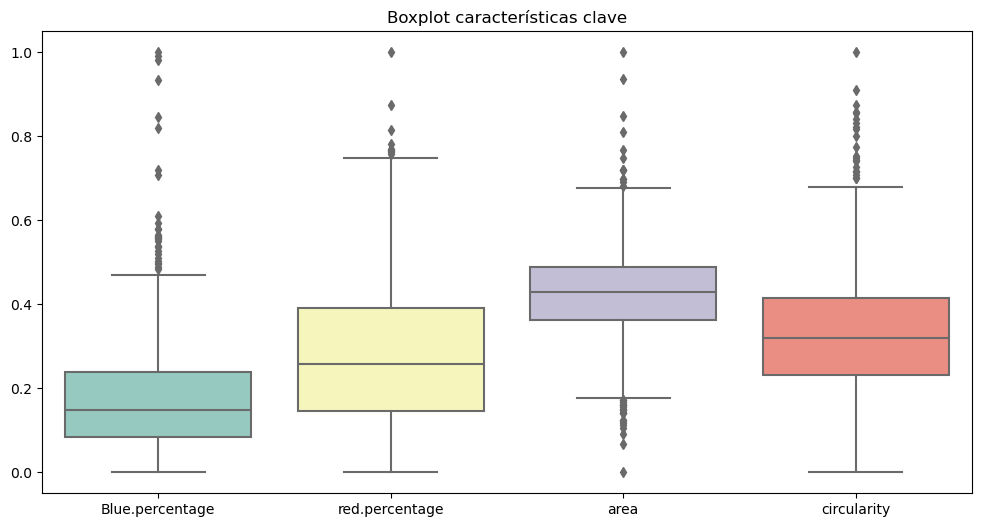

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Blue.percentage', 'red.percentage', 'area', 'circularity']], palette="Set3")
plt.title('Boxplot características clave')
plt.show()

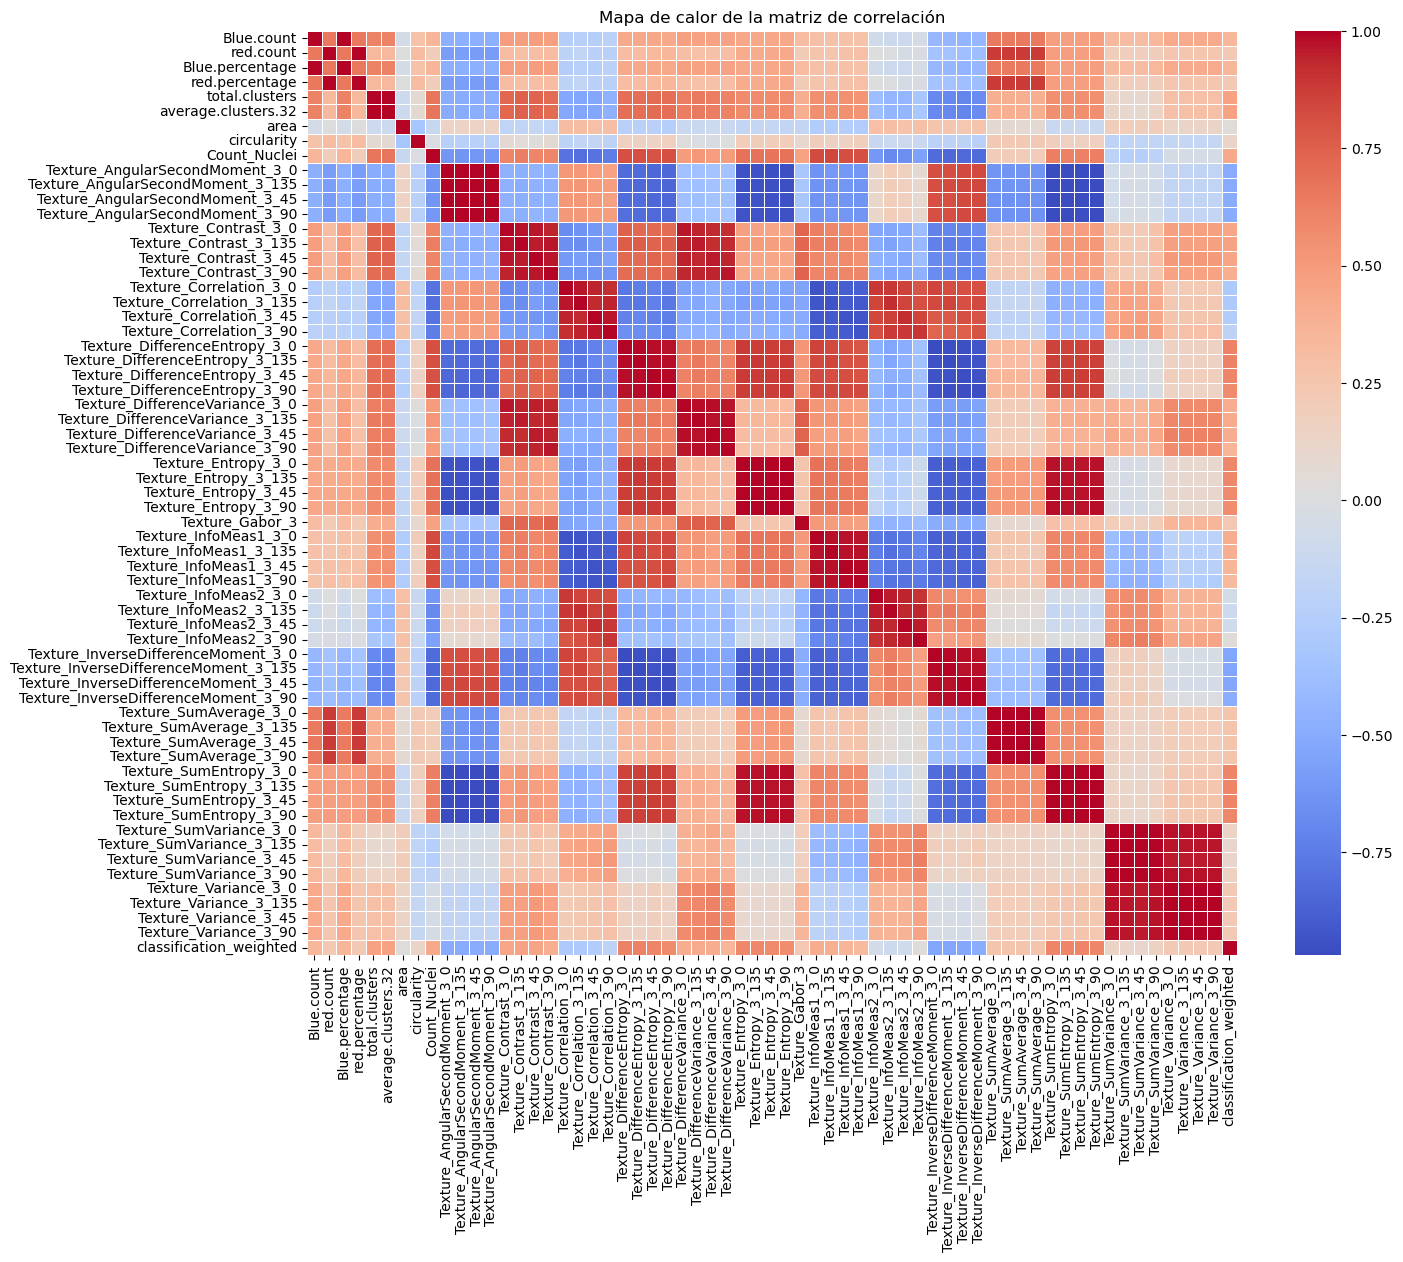

In [56]:
classification_weight = {
    'Non-Tumor': 1,
    'Non-Viable-Tumor': 2,
    'viable: non-viable': 3,
    'Viable': 4,
}

df['classification_weighted'] = df['classification'].map(classification_weight)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

In [58]:
correlation_with_class = correlation_matrix['classification_weighted'].sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(correlation_with_class)

classification_weighted                  1.000000
Texture_DifferenceEntropy_3_0            0.609410
Texture_DifferenceEntropy_3_135          0.608757
Texture_SumEntropy_3_135                 0.603431
Texture_SumEntropy_3_45                  0.602175
Texture_DifferenceEntropy_3_45           0.601817
Texture_SumEntropy_3_0                   0.601213
Texture_SumEntropy_3_90                  0.597034
Texture_Entropy_3_0                      0.585934
Texture_Entropy_3_135                    0.585706
Texture_Entropy_3_45                     0.581157
Texture_DifferenceEntropy_3_90           0.569198
Texture_Entropy_3_90                     0.568891
total.clusters                           0.466746
average.clusters.32                      0.466746
Texture_Contrast_3_135                   0.456215
Texture_Contrast_3_45                    0.447556
Texture_Contrast_3_0                     0.439193
Count_Nuclei                             0.428861
Texture_DifferenceVariance_3_135         0.421818


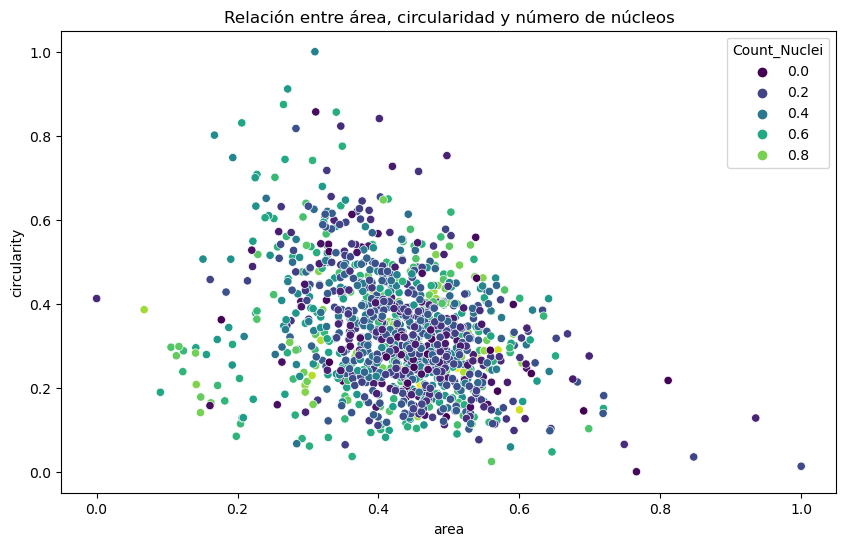

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='circularity', hue='Count_Nuclei', data=df, palette='viridis')
plt.title('Relación entre área, circularidad y número de núcleos')
plt.show()

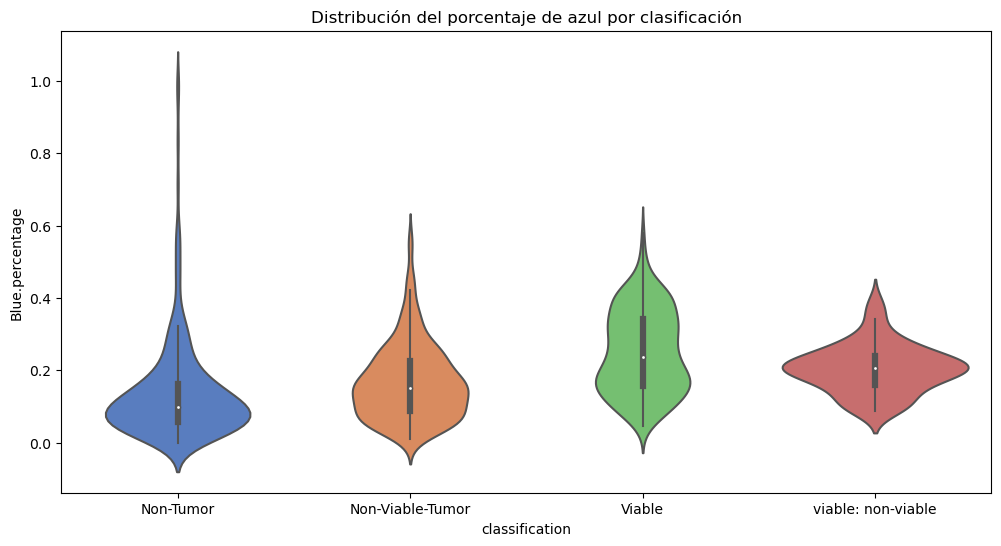

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='classification', y='Blue.percentage', data=df, palette="muted")
plt.title('Distribución del porcentaje de azul por clasificación')
plt.show()

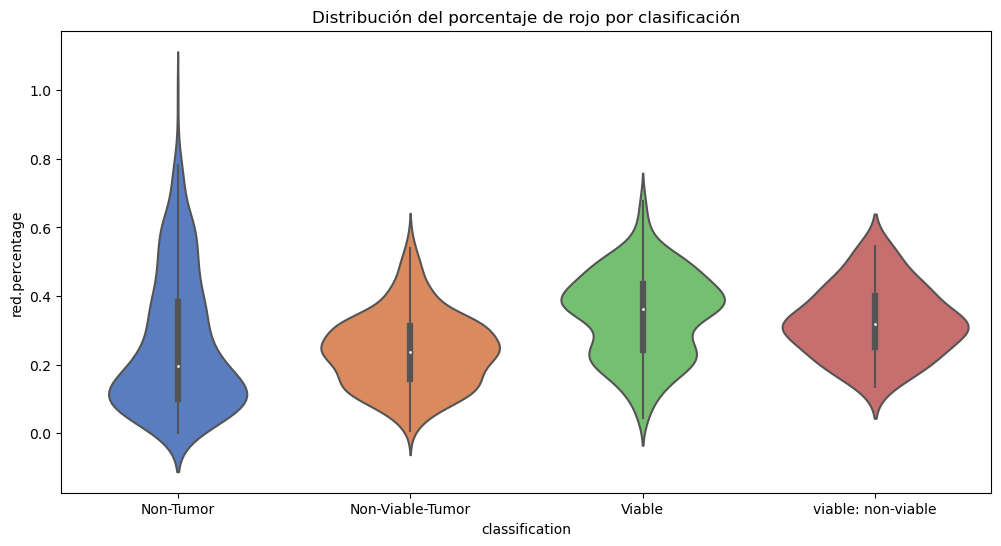

In [21]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='classification', y='red.percentage', data=df, palette="muted")
plt.title('Distribución del porcentaje de rojo por clasificación')
plt.show()

Found 490 images belonging to 11 classes.
Clases encontradas: ['set1', 'set10', 'set11', 'set2', 'set3', 'set4', 'set5', 'set6', 'set7', 'set8', 'set9']
Distribución de clases: Counter({3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50, 10: 50, 2: 48, 1: 42})


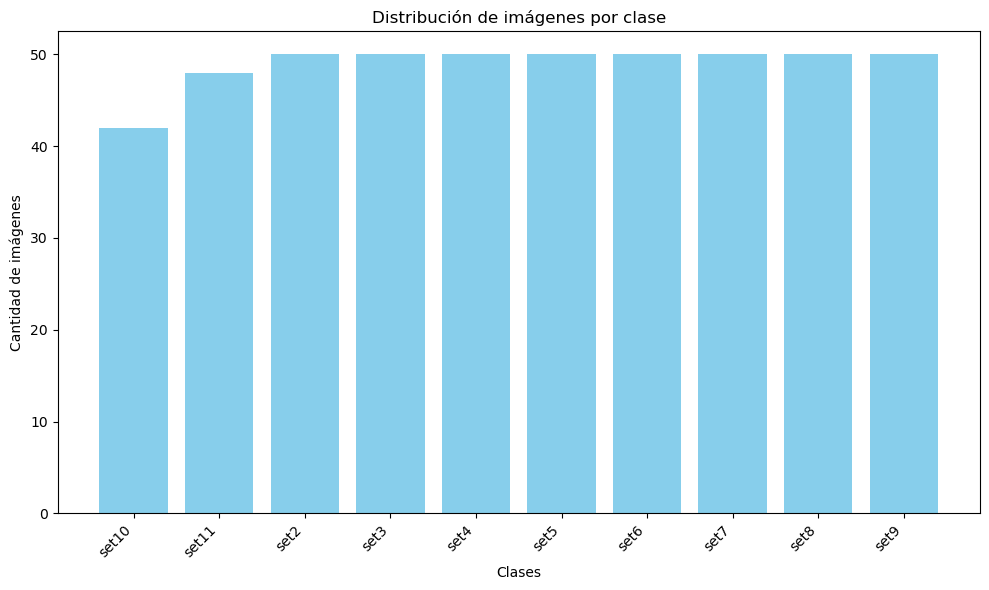

In [23]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta de tu dataset
data_dir = "./Training-set/Training-Set-1/"

# Usa ImageDataGenerator para cargar el dataset y realizar procesamiento básico
datagen = ImageDataGenerator(rescale=1./255)

# Carga el dataset de imágenes
dataset = datagen.flow_from_directory(
    data_dir, 
    target_size=(128, 128), 
    batch_size=32, 
    class_mode='sparse'
)

# Obtener la lista de clases
class_names = list(dataset.class_indices.keys())
print("Clases encontradas:", class_names)

# Obtener la distribución de clases
counter = Counter(dataset.classes)
print("Distribución de clases:", counter)

class_indices = {v: k for k, v in dataset.class_indices.items()}

# Crear una lista de nombres de clases correspondientes a los índices
class_labels = [class_indices[i] for i in class_counts.keys()]
class_values = list(class_counts.values())

# Crear el gráfico de barras con los nombres de las clases
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Clases')
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución de imágenes por clase')

# Rotar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Conclusiones

### 1. Distribuciones de Color (Azul y Rojo

**Hipótesis:** El porcentaje y la cantidad de color en las imágenes está relacionado con la clasificación de los tumores (viable, no viable, etc.).

**Conclusión:** Los histogramas de las variables como Blue.count, red.count, Blue.percentage, y red.percentage indican que la mayoría de las muestras tienen concentraciones relativamente bajas de azul y rojo. Esto podría sugerir que una mayor cantidad de estos colores no es un factor determinante en la clasificación de las imágenes tumorales.

### 2. Distribución de 

**Hipótesis:** La variabilidad en la textura tiene un impacto en la viabilidad del tumor.

**Conclusión:** Los histogramas de las variables relacionadas con la textura (p. ej., Texture_Variance_3_0, Texture_Variance_3_135) parecen seguir una distribución normal, con la mayoría de los valores concentrados alrededor del medio. Este patrón podría indicar que la textura podría tener un valor predictivo, ya que las texturas homogéneas o muy variadas parecen menos comunes.

### 3. Clasificación de Imágenes (Non-Tumor, Viable, etc

**Hipótesis:** La mayoría de las imágenes corresponden a tumores no viables o no tumorales

**Conclusión:** La gráfica de barras indica que la mayoría de las imágenes en el dataset corresponden a la clase "Non-Tumor", seguido por "Non-Viable-Tumor". La clase "viable: non-viable" tiene una menor representación. Esto sugiere que el dataset puede estar desequilibrado en favor de muestras no tumorales, lo cual podría afectar los resultados de los modelos predictivos.

### 4. Boxplot de Características Clave

**Hipótesis:** Variables como Blue.percentage, red.percentage, area, y circularity afectan la clasificación del tumor

**Conclusión:** El boxplot muestra la dispersión de estas variables, destacando que hay muchos valores atípicos (outliers) en todas las características. Esto podría indicar que hay una amplia variabilidad dentro del dataset y que estas variables podrían ser significativas en la clasificación de las muestras tumorales.

### Conclusión General:

La distribución de las variables de color, textura y forma muestra una variabilidad considerable entre las imágenes. Los gráficos sugieren que las características clave como la textura y la circularidad podrían tener un impacto en la clasificación del tumor, pero también resaltan la necesidad de manejar adecuadamente las clases desequilibradas para mejorar la capacidad predictiva del modelo. Las variables de color, aunque distribuidas mayormente en niveles bajos, no parecen ser los principales determinantes.